In [3]:
import time
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output


plt.style.use('ggplot')

* [Оптимизация функций градиентым спуском](#Оптимизация-функций-градиентым-спуском)
    * [Градиентный спуск для одномерной функции](#Градиентный-спуск-для-одномерной-функции)
    * [Градиентный спуск для функции двух переменных](#Градиентный-спуск-для-функции-двух-переменных)
    * [Autograd](#Autograd)

Для начала реализуем функции, необходимые нам для визуализации. Визуализации функции одной переменной:

In [2]:
def plot_1d_fuction(xs: list, ys: list, title: str, figsize=(15, 5)):
    
    '''
    
    xs – значения функции по x
    ys – значения функции по y
    
    title – заголовок картинки
    msg – информация для отображения на картинке
    
    figsize – размер картинки
    
    '''
    
    plt.figure(figsize=figsize)
    plt.plot(xs, ys, 'b')
    plt.title(title)
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$');

Функция для отрисовки графика и значение функции в точке x:

In [3]:
def plot_line_with_x(xs: list, ys: list, x: float, fx: float, title: str, msg='', figsize=(15, 5)):
    
    '''
    
    xs – значения функции по x
    ys – значения функции по y
    
    x – текущее положение точки по x
    fx – текущее положение точки по y
    
    title – заголовок картинки
    msg – информация для отображения на картинке
    
    figsize – размер картинки
    '''
    
    clear_output(True)
    plt.figure(figsize=figsize)
    plt.plot(xs, ys, 'b')
    plt.scatter([x], [fx], c='r', marker='x', s=120)
    
    plt.title(title)
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.text(s=msg, x=-2, y=103)
    plt.show()

<p>Начнем с поиска минимума полинома шестой&nbsp;степени <span class="math-tex">\(f(x) = x^6 + 3x^5 - 15x^3-24x^2+15x-10\)</span>. Реализуем функцию для вычисления значений&nbsp;<span class="math-tex">\(f\)</span>:</p>

In [4]:
def f_1d(x):
    return (x ** 6) + 3 * (x ** 5) - 15 * (x ** 3) - 24 * (x ** 2) + 15 * x - 10

Нарисуем график функции на отрезке от -3 до 2.5:

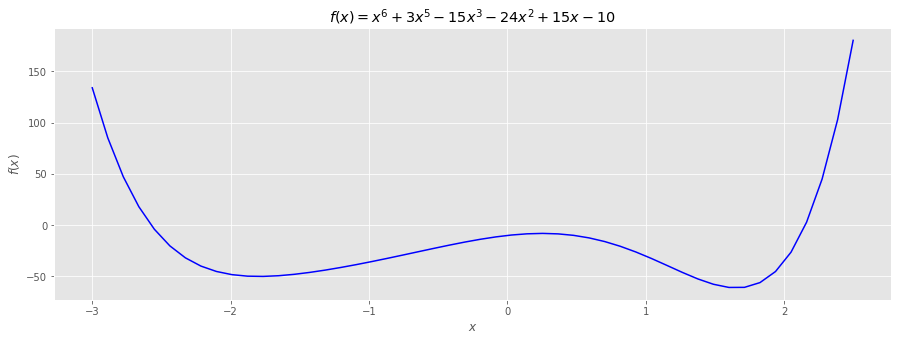

In [5]:
title_f_1d = '$f(x) = x^{6} + 3x^{5} - 15x^{3} - 24x^{2} + 15x - 10$'

xs = np.linspace(-3, 2.5)
ys = f_1d(xs)

plot_1d_fuction(xs, ys, title=title_f_1d)

Видим, что у функции два минимума.  

<p>Алгоритм градиентного спуска в самом общем виде выглядит так:</p>

<p><code>until converge:<br />
&nbsp; &nbsp; x = x - alpha * grad(f(x))</code></p>

<p>где <code>alpha</code> &mdash; это скорость обучения (то, как сильно мы меняем своё положение на каждом шаге).</p>


<p>Реализуем функцию для его вычисления в нужной нам точке:</p>

In [6]:
def grad(x):
    pass

<p>Всё готово для поиска минимума функции <span class="math-tex">\(f\)</span> методом градиентного спуска.<br />
&nbsp;</p>

<p>Начнем с точки <span class="math-tex">\(x_0=0.2\)</span>, величину шага&nbsp;<span class="math-tex">\(\alpha\)</span>&nbsp;примем равной <span class="math-tex">\(0.03\)</span>&nbsp;и будем останавливать итерации, если абсолютное значение градиента не превышает&nbsp;<span class="math-tex">\(10^{-4}\)</span>&nbsp;(параметр <code>tol</code>).</p>

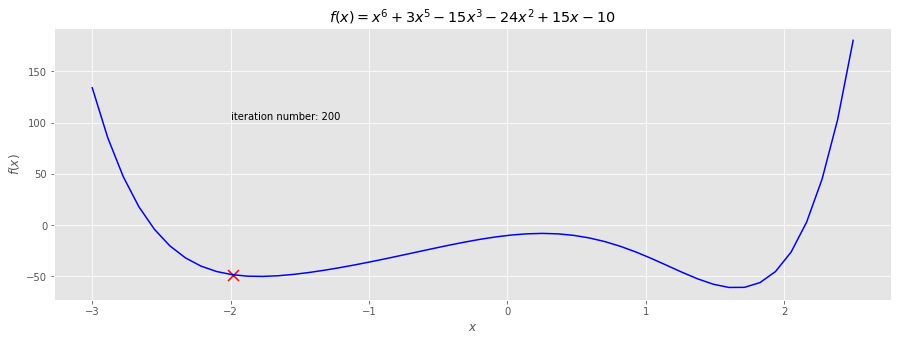

In [7]:
alpha = 0.03
tol = 1e-4

x = 0.2

max_iteration = 200
iteration = 0

dfdx = ...

 
until converge:
    

    plot_line_with_x(xs, ys, x, f_1d(x), msg=f'iteration number: {iteration}', title=title_f_1d)



<p>Видим, что оптимизации из этой стартовой точки c alpha=0.03 приводим к колебаниям в районе локального минимума.</p>
<p>Попробуем начать их с точки&nbsp;<span class="math-tex">\(x_0=-3.05\)</span>:</p>

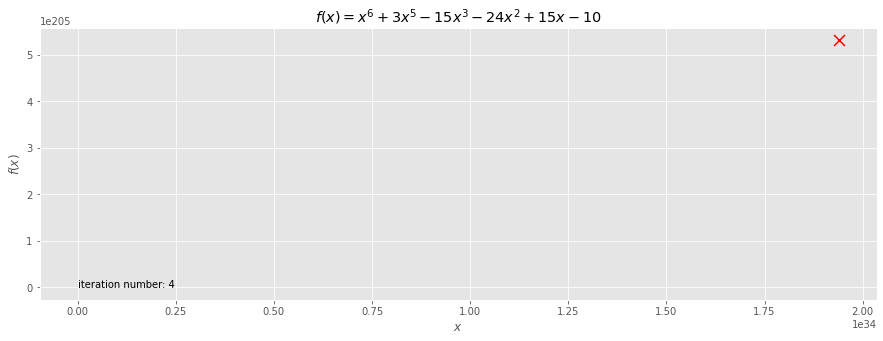

OverflowError: (34, 'Result too large')

In [8]:
alpha = 0.03
tol = 1e-4

x = -3.05



<p>Такая стартовая точка приводит к тому, что градиент становится всё больше и больше с каждой итерацией алгоритма&nbsp;&mdash; и в результате <span class="math-tex">\(x\)</span>&nbsp;уходит&nbsp;так далеко от минимумов функции, что тип <code>float</code> переполняется. Справиться с этой проблемой можно с помощью&nbsp;клиппинга градиента: будем&nbsp;ограничивать максимальное абсолютное значение у переменной<code>dfdx</code>:</p>

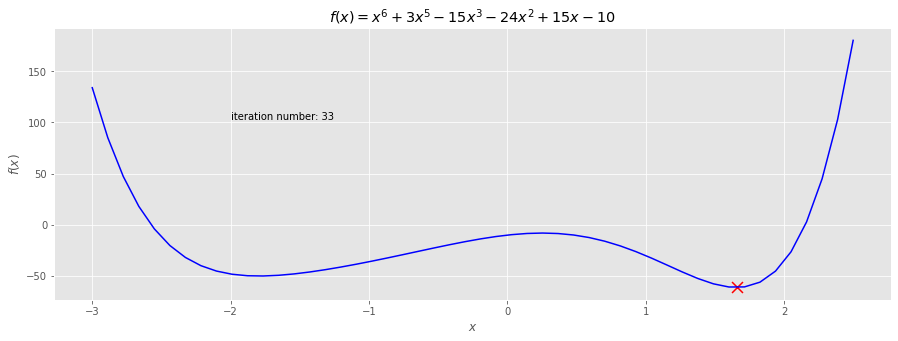

In [9]:
alpha = 0.003
tol = 1e-4

x = 2.5



### Градиентный спуск для функции двух переменных
Для экспериментов с функциями от двух переменных сначала реализуем функции для визуализации.

Визуализация 2d функции:

In [40]:
def plot_2d_function(W, B, J, title, figsize=(12, 8)):
    
    '''
    W – матрица параметров по оси x
    B – матрица параметров по оси y
    J – функция которую мы будем оптимизировать
    
    title – заголовок картинки
    '''
    
    plt.figure(figsize=figsize)
    plt.contourf(W, B, J, levels=25)
    plt.title(title)
    plt.ylabel('$b$')
    plt.xlabel('$W$');

<p>Для примера мы будем находить минимум функции&nbsp;</p>

<p style="text-align:center"><span class="math-tex">\(J(w, b) = (w - 25)^2 + (2b - 22)^2 + (w - 25)(2b - 22)\)</span></p>

<p>на отрезках&nbsp;<span class="math-tex">\([-5, 36]\)</span>&nbsp;и&nbsp;<span class="math-tex">\([-5, 50]\)</span>&nbsp; для&nbsp;<span class="math-tex">\(w\)</span>&nbsp;и <span class="math-tex">\(b\)</span>&nbsp;соответственно.</p>


<p>Реализуем функцию для получения значений&nbsp;<span class="math-tex">\(J\)</span>, <span class="math-tex">\(\frac{\partial J}{\partial w}\)</span>&nbsp;и <span class="math-tex">\(\frac{\partial J}{\partial b}\)</span>:</p>

(𝑥+2𝑦−7)^2+(2𝑥+𝑦−5)^2

In [11]:
W_RANGE = (-5, 36)
B_RANGE = (-5, 50)

# x = w
# y = b
def f_2d(w, b):
    
    '''Функцию для получения значений J.'''
    
    return (w + 2*b - 7) ** 2 + (2*w + b - 5) ** 2


def grad_w(w, b):
    
    '''Функцию для получения значений производной функции J по параметру w.'''
    
    return 2*(w+2*b-7)+4*(2*w+b-5)



def grad_b(w, b):
    
    '''Функцию для получения значений производной функции J по параметру b.'''
    
    return 4*(w + 2*b - 7) + 2*(2*w + b - 5)




<p>&nbsp;Функция, которая генерирует матрицы значений для параметров <span class="math-tex">\(w\)</span>, <span class="math-tex">\(b\)</span> и функции <span class="math-tex">\(J\)</span>.</p>

In [12]:
def get_function_parameter_space(wrange=W_RANGE, brange=B_RANGE, num=100, function=f_2d):
    
    '''Функция, которая генерирует матрицы значений для параметров'''
    
    w_grid = np.linspace(W_RANGE[0], W_RANGE[1], num=num)
    b_grid = np.linspace(B_RANGE[0], B_RANGE[1], num=num)

    W, B = np.meshgrid(w_grid, b_grid)
    J = function(W, B)
    
    return W, B, J


<p>Визуализация градиентного спуска: </p>

In [13]:
def plot_2d_gradient_descent(W, B, J, ws: list, bs: list, title: str, iteration_number: int,
                             figsize=(8, 12), levels=25):

    '''
    
    W – матрица параметров по оси x
    B – матрица параметров по оси y
    J – функция, которую мы будем оптимизировать
    
    ws – список с историей координат точки по оси x
    bs – список с историей координат точки по оси y
    
    title – заголовок картинки
    
    iteration_number – номер итерации
    figsize – размер картинки
    
    levels – количество линий уровня для отображения
    
    '''
    
    clear_output(True)
    fig, ax = plt.subplots(figsize=(12, 8))
    
    fig.set_figheight(figsize[0])
    fig.set_figwidth(figsize[1])

    cs = ax.contourf(W, B, J, levels=levels)
    ax.plot(ws, bs, 'r')

    iteration_msg = f'iteration: {iteration_number}' 
    parameters_msg = f'b: {round(bs[-1], 1)}, w: {round(ws[-1], 1)}'
    
    x_text_loc = W_RANGE[0] + (W_RANGE[1] - W_RANGE[0]) / 10
    y_text_loc = B_RANGE[0] + (B_RANGE[1] - B_RANGE[0]) / 2
    
    plt.text(
        s=iteration_msg + '\n' + parameters_msg,
        c='w', x=x_text_loc, y=y_text_loc
    )
    plt.title(title)
    plt.ylabel('$b$')
    plt.xlabel('$W$')
    
    plt.show()

<p>Реализуем оптимизацию с помощью цикла <code>while</code> с условием выхода, завязанным на количество итераций и норму вектора градиента:</p>

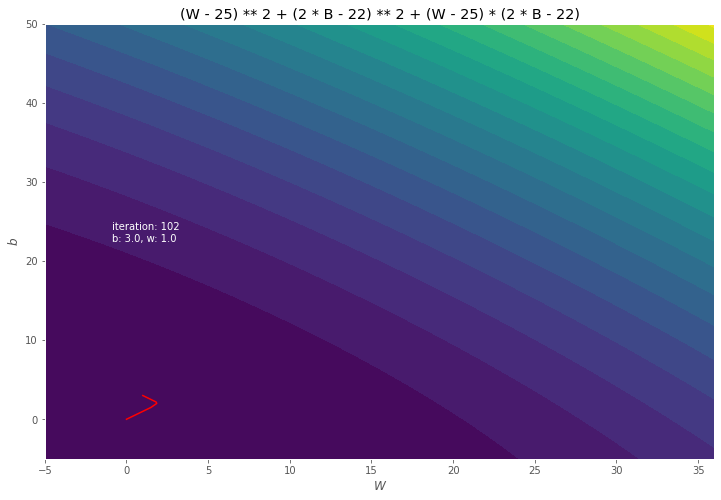

In [24]:
W, B, J = get_function_parameter_space()
title_f_2d = '(W - 25) ** 2 + (2 * B - 22) ** 2 + (W - 25) * (2 * B - 22)'

w, b = 0., 0.

ws = [w]
bs = [b]

iteration_number = 0
alpha = 0.05
tol = 1e-4

dJdw, dJdb = np.inf, np.inf

while iteration_number < 200 and  np.linalg.norm([dJdw, dJdb])> tol:
    
    dJdw = np.clip(grad_w(w, b), -10, 10)
    dJdb = np.clip(grad_b(w, b), -10, 10)
    
    
    w = w - alpha*dJdw
    b = b - alpha*dJdb
    
    iteration_number += 1
    
    plot_2d_gradient_descent(W, B, J, ws, bs, title=title_f_2d, iteration_number=iteration_number)
    
    ws.append(w)
    bs.append(b)

<p>Для того, чтобы уменьшить осцилляции, можно добавить импульс. Для этого на каждом шаге алгоритма&nbsp;будем учитывать не только направление градиента в текущей точке, но и&nbsp;градиент на предыдущем шаге. Алгоритм обновления весов для параметра <span class="math-tex">\(w\)</span>&nbsp;будет выглядеть так:</p>

<p style="text-align:center"><br />
<span class="math-tex">\(v_{w}^{t} = \beta v_{w}^{t-1} + (1 - \beta)\frac{\partial J}{\partial w}\)</span><br />
<span class="math-tex">\(w^{t} = w^{t-1} - \alpha v_{w}^{t}\)</span></p>

<p>С добавлением импульса у нас появился дополнительный параметр <code>beta</code>, который будет регулировать, в каком соотношении мы будем учитывать градиент на предыдущем&nbsp;шаге и в данный момент.</p>

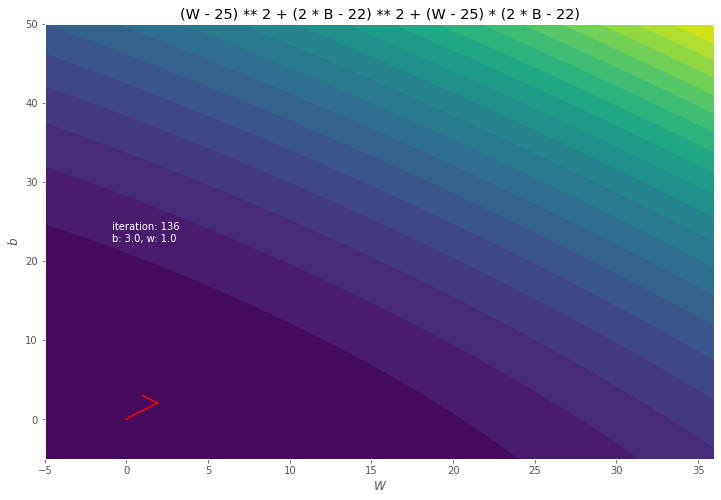

In [25]:
w, b = 0, 0

ws = [w]
bs = [b]

iteration_number = 0
alpha = 0.05
tol = 1e-4

dJdw, dJdb = np.inf, np.inf

v_w, v_b = 0, 0
beta = 0.25

while iteration_number < 200 and  np.linalg.norm([dJdw, dJdb])> tol:
    
    dJdw = np.clip(grad_w(w, b), -10, 10)
    dJdb = np.clip(grad_b(w, b), -10, 10)
    
    v_w = beta*v_w + (1 - beta)*dJdw
    w = w - alpha*v_w
    
    v_b = beta*v_w + (1 - beta)*dJdb
    b = b - alpha*v_b
    
    iteration_number += 1
    time.sleep(0.1 / iteration_number)
    
    plot_2d_gradient_descent(W, B, J, ws, bs, title=title_f_2d, iteration_number=iteration_number)
    
    ws.append(w)
    bs.append(b)

С добавлением импульса скорость поиска минимума заметно возросла — удалось найти минимум за 28 итераций алгоритма вместо 128 итераций для реализации без импульса.

<p>Для тестирования алгоритмов оптимизации&nbsp;есть <a href="https://en.wikipedia.org/wiki/Test_functions_for_optimization" rel="noopener noreferrer nofollow">специальные функции</a>.</p>

<p>Чтобы прочувствовать нюансы, которые мы обсуждали на семинаре, попробуйте найти минимумы одной из следующих функций:</p>

<p style="text-align:center"><span class="math-tex">\(f(x,y)=2x^{2}-1.05x^{4}+{\frac {x^{6}}{6}}+xy+y^{2}\)</span>&nbsp;&ndash; Three-hump camel function</p>

<p style="text-align:center"><span class="math-tex">\(f(x,y)=\sin \left(x+y\right)+\left(x-y\right)^{2}-1.5x+2.5y+1\)</span>&nbsp;&ndash; McCormick function</p>

<p style="text-align:center"><span class="math-tex">\(f(x,y)=0.26\left(x^{2}+y^{2}\right)-0.48xy\)</span>&nbsp;&ndash; Matyas function</p>

<p style="text-align:center"><span class="math-tex">\(f(x,y)=\left(x+2y-7\right)^{2}+\left(2x+y-5\right)^{2}\)</span>&nbsp;&ndash; Booth function</p>

<p style="text-align:center"><span class="math-tex">\(f(x,y)=\left(1.5-x+xy\right)^{2}+\left(2.25-x+xy^{2}\right)^{2} {\displaystyle +\left(2.625-x+xy^{3}\right)^{2}}+\left(2.625-x+xy^{3}\right)^{2}\)</span>&nbsp;&ndash; Beale function</p>


### Autograd
В библиотеках для работы с deeplearning, таких как Pytorch и Tensorflow, есть функционал для автоматического вычисления градиента:

In [24]:
import torch

def f_1d(x):
    return (x ** 6) + 3 * (x ** 5) - 15 * (x ** 3) - 24 * (x ** 2) + 15 * x - 10

def grad(x):
    return 6 * (x ** 5) + 15 * (x ** 4) - 45 * (x ** 2) - 48 * x + 15


x = torch.tensor(1., requires_grad=True)
y = f_1d(x)

.backward() — функция для расчёта градиента:

In [25]:
y.backward()

После выполнения функции градиент хранится в переменной $x$: 

In [26]:
x.grad

tensor(-57.)

Проверим, что Pytorch правильно выполнил вычисление градиента с помощью нашей функции:

In [19]:
grad(1)

-57